# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix


# EDA MOBILE PRICE

In [2]:
df=pd.read_csv('train.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
df.columns.tolist()

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.describe().round(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.00,2000.0,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,...,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.0,2000.00,2000.00
mean,1238.52,0.5,1.52,0.51,4.31,0.52,32.05,0.50,140.25,4.52,...,645.11,1251.52,2124.21,12.31,5.77,11.01,0.76,0.5,0.51,1.50
std,439.42,0.5,0.82,0.50,4.34,0.50,18.15,0.29,35.40,2.29,...,443.78,432.20,1084.73,4.21,4.36,5.46,0.43,0.5,0.50,1.12
min,501.00,0.0,0.50,0.00,0.00,0.00,2.00,0.10,80.00,1.00,...,0.00,500.00,256.00,5.00,0.00,2.00,0.00,0.0,0.00,0.00
25%,851.75,0.0,0.70,0.00,1.00,0.00,16.00,0.20,109.00,3.00,...,282.75,874.75,1207.50,9.00,2.00,6.00,1.00,0.0,0.00,0.75
50%,1226.00,0.0,1.50,1.00,3.00,1.00,32.00,0.50,141.00,4.00,...,564.00,1247.00,2146.50,12.00,5.00,11.00,1.00,1.0,1.00,1.50
75%,1615.25,1.0,2.20,1.00,7.00,1.00,48.00,0.80,170.00,7.00,...,947.25,1633.00,3064.50,16.00,9.00,16.00,1.00,1.0,1.00,2.25
max,1998.00,1.0,3.00,1.00,19.00,1.00,64.00,1.00,200.00,8.00,...,1960.00,1998.00,3998.00,19.00,18.00,20.00,1.00,1.0,1.00,3.00


In [6]:
df['battery_efficiency'] = df['battery_power'] / df['mobile_wt']


In [7]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,battery_efficiency
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,4.478723
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,7.507353
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,3.882759
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,4.694656
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,12.914894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,0,7.490566
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,2,10.508021
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,3,17.694444
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,0,10.427586


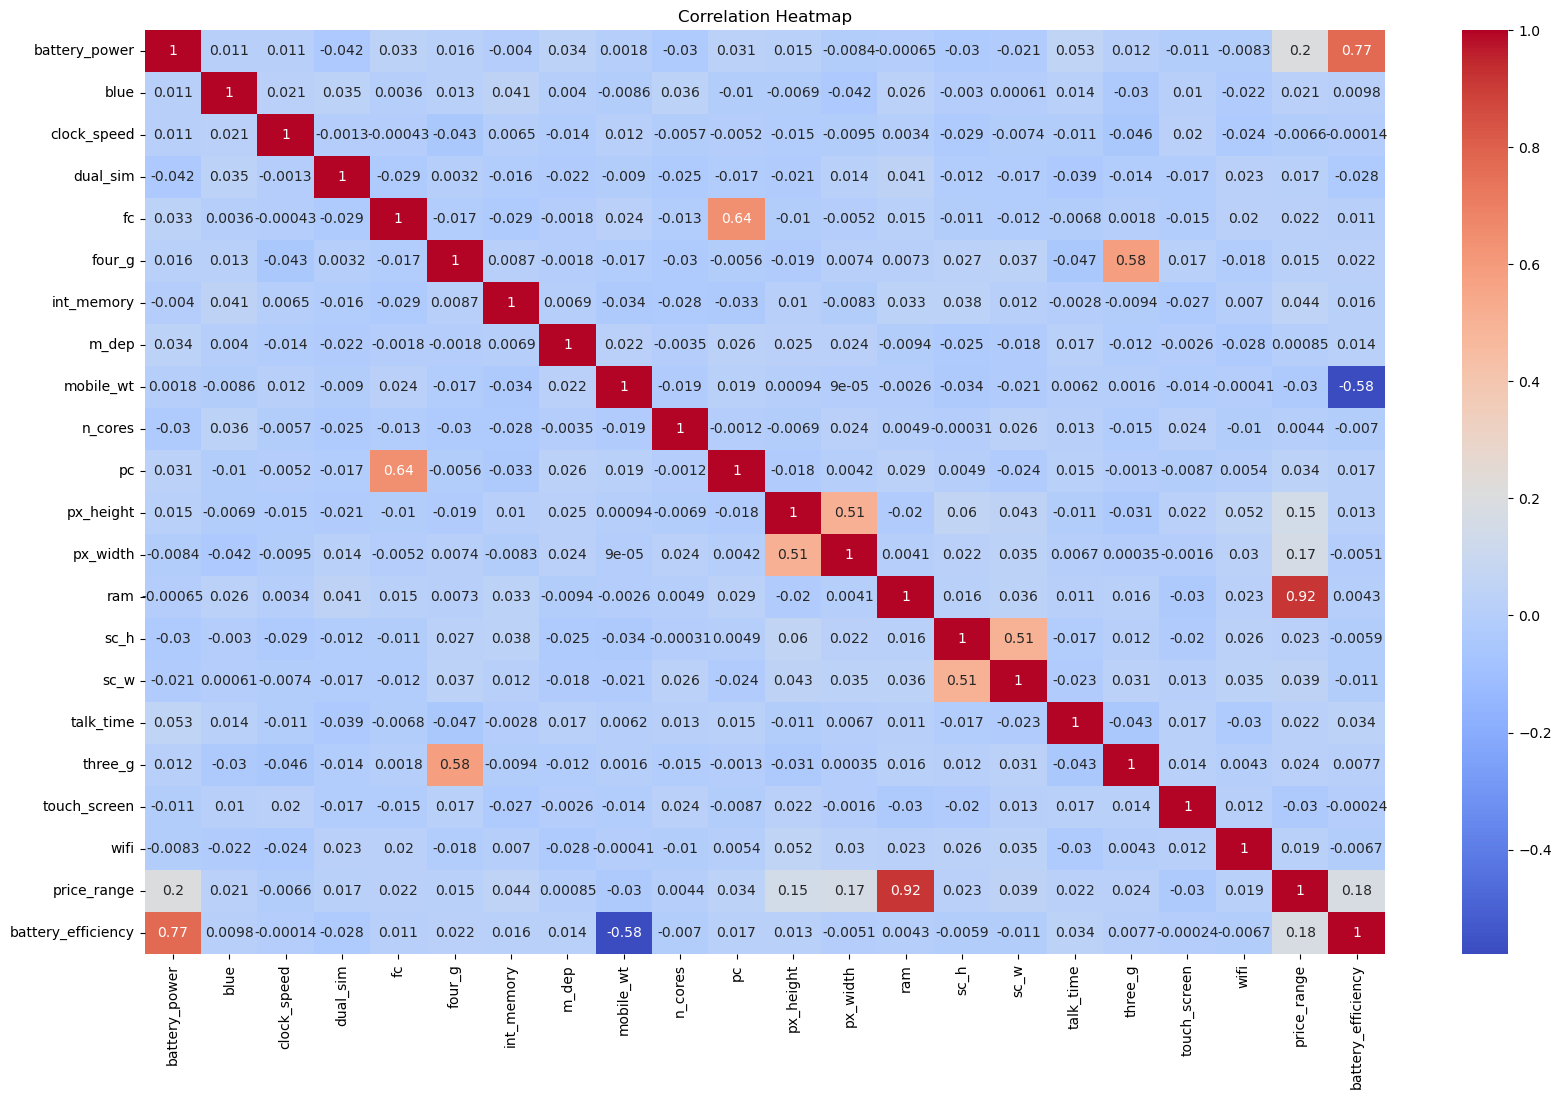

In [8]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

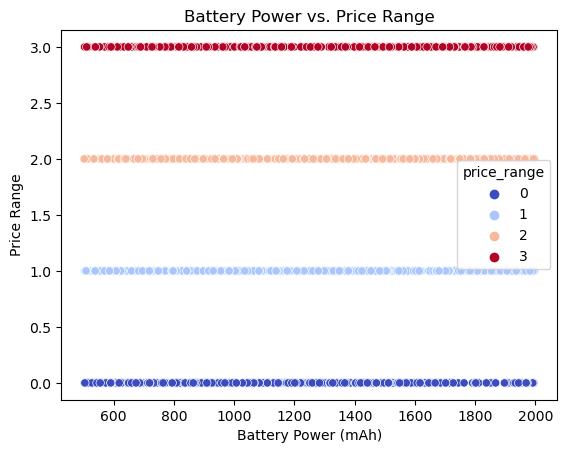

In [9]:
sns.scatterplot(
    x="battery_power",
    y="price_range",
    hue="price_range",
    palette="coolwarm",
    data=df,

)

plt.xlabel("Battery Power (mAh)")
plt.ylabel("Price Range")
plt.title("Battery Power vs. Price Range")
plt.show()

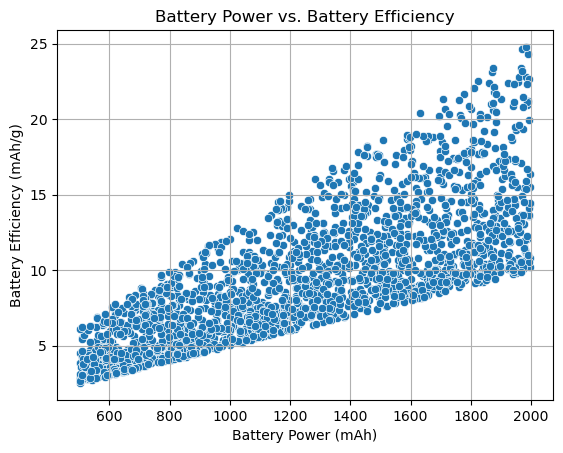

In [10]:
sns.scatterplot(x="battery_power", y="battery_efficiency", data=df)
plt.xlabel("Battery Power (mAh)")
plt.ylabel("Battery Efficiency (mAh/g)")
plt.title("Battery Power vs. Battery Efficiency")
plt.grid(True)
plt.show()

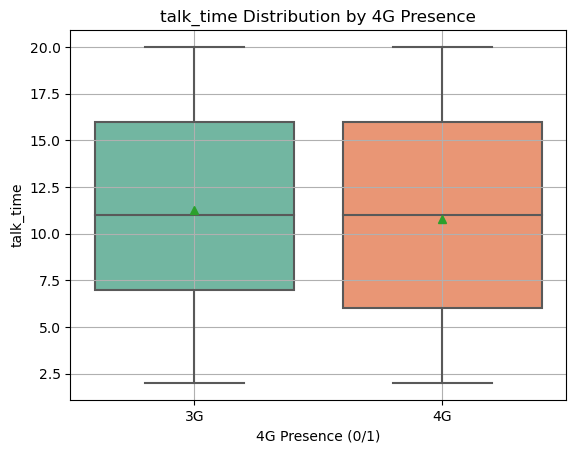

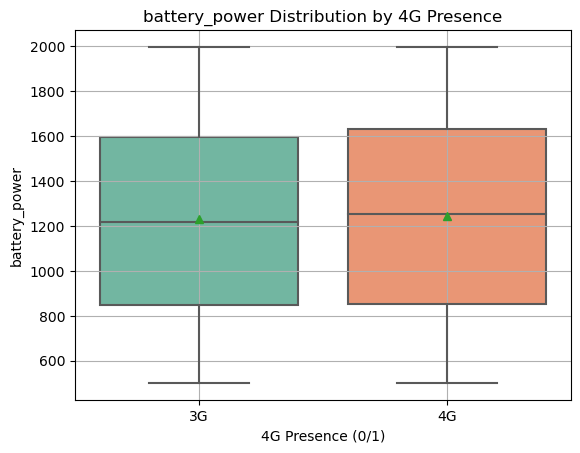

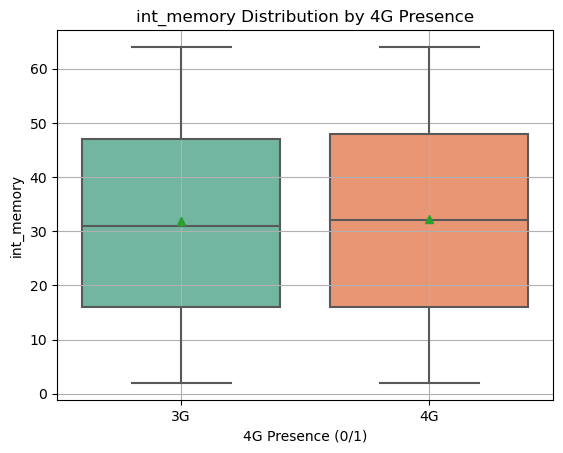

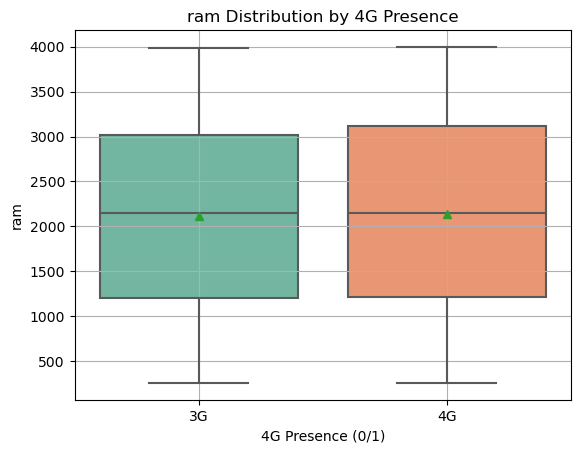

In [11]:
features = ["talk_time", "battery_power", "int_memory", "ram"] 

for feature in features:
    sns.boxplot(
        x="four_g",
        y=feature,
        showmeans=True,  # Display mean value as a dot
        data=df,
        palette="Set2",
    )
    plt.xlabel("4G Presence (0/1)")
    plt.ylabel(feature)
    plt.title(f"{feature} Distribution by 4G Presence")
    plt.xticks([0, 1], ["3G", "4G"])
    plt.grid(True)
    plt.show()

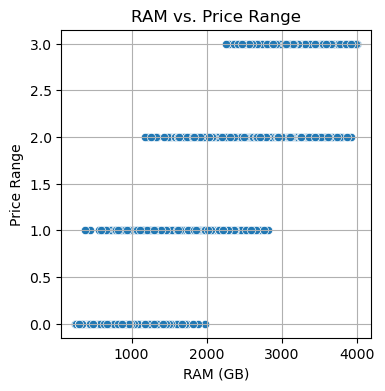

In [12]:
plt.figure(figsize=(4,4))
sns.scatterplot(x="ram", y="price_range", data=df)
plt.xlabel("RAM (GB)")
plt.ylabel("Price Range")
plt.title("RAM vs. Price Range")
plt.grid(True)
plt.show()


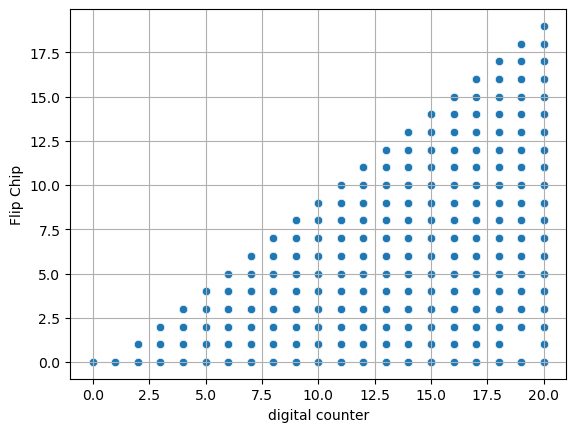

In [13]:
sns.scatterplot(x="pc", y="fc", data=df)
plt.xlabel("digital counter")
plt.ylabel("Flip Chip")
plt.grid(True)
plt.show()

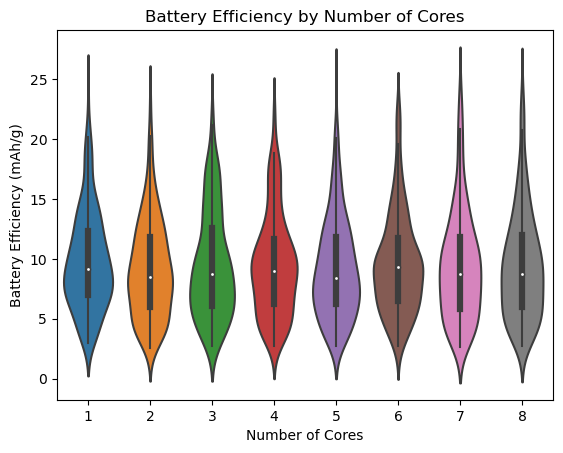

In [14]:
sns.violinplot(x='n_cores', y='battery_efficiency', data=df)
plt.xlabel('Number of Cores')
plt.ylabel('Battery Efficiency (mAh/g)')
plt.title('Battery Efficiency by Number of Cores')
plt.show()

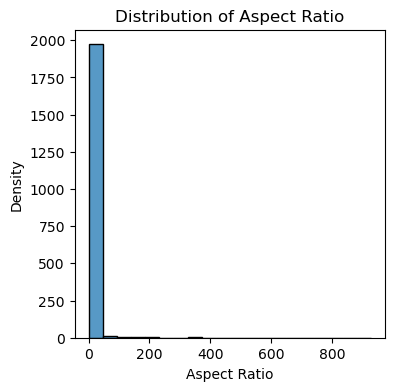

In [15]:
plt.figure(figsize=(4,4))
df["aspect_ratio"] = df["px_width"] / df["px_height"]
sns.histplot(df["aspect_ratio"], bins=20)
plt.xlabel("Aspect Ratio")
plt.ylabel("Density")
plt.title("Distribution of Aspect Ratio")
plt.show()

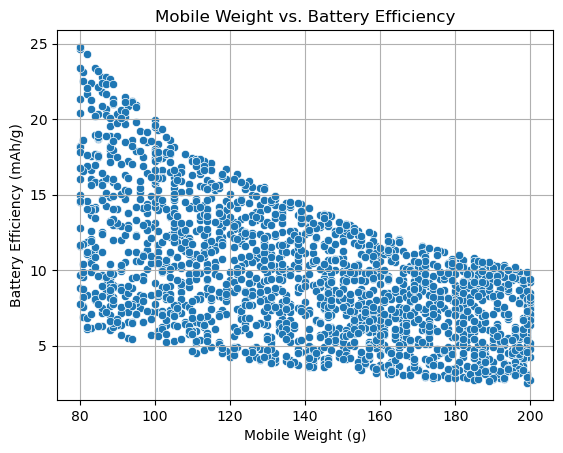

In [16]:
sns.scatterplot(x="mobile_wt", y="battery_efficiency", data=df)
plt.xlabel("Mobile Weight (g)")
plt.ylabel("Battery Efficiency (mAh/g)")
plt.title("Mobile Weight vs. Battery Efficiency")
plt.grid(True)
plt.show()

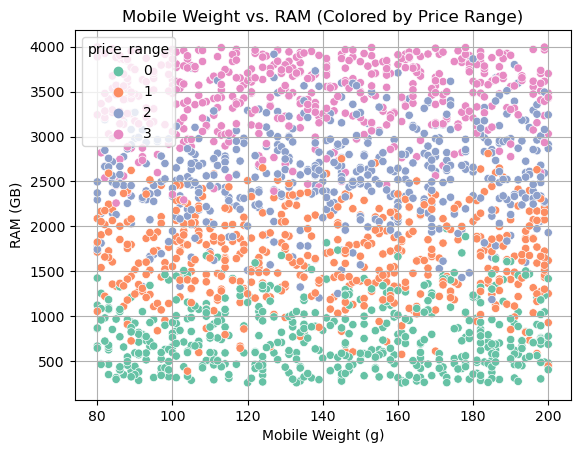

In [17]:
sns.scatterplot(
    x="mobile_wt",
    y="ram",
    hue="price_range",
    palette="Set2",  # Adjust palette for your data
    data=df,
)
plt.xlabel("Mobile Weight (g)")
plt.ylabel("RAM (GB)")
plt.title("Mobile Weight vs. RAM (Colored by Price Range)")
plt.grid(True)
plt.show()

# Buildng ML Model 

In [18]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,battery_efficiency,aspect_ratio
0,842,0,2.2,0,1,0,7,0.6,188,2,...,2549,9,7,19,0,0,1,1,4.478723,37.800000
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,2631,17,3,7,1,1,0,2,7.507353,2.196685
2,563,1,0.5,1,2,1,41,0.9,145,5,...,2603,11,2,9,1,1,0,2,3.882759,1.358670
3,615,1,2.5,0,0,0,10,0.8,131,6,...,2769,16,8,11,1,0,0,2,4.694656,1.468750
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1411,8,2,15,1,1,0,1,12.914894,1.003311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,668,13,4,19,1,1,0,0,7.490566,1.546645
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,2032,11,10,16,1,1,1,2,10.508021,2.147541
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,3057,9,1,5,1,1,0,3,17.694444,1.880184
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,869,18,10,19,1,1,1,0,10.427586,1.994048


In [19]:
df.drop(columns=['battery_efficiency', 'aspect_ratio'],inplace=True)

In [20]:
x = df.drop(columns='price_range')
y = df.price_range.values.reshape(-1,1)

In [21]:
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [22]:
y

array([[1],
       [2],
       [2],
       ...,
       [3],
       [0],
       [3]], dtype=int64)

# Feature Enginering

In [23]:
sc = MinMaxScaler()
x = sc.fit_transform(x)
x

array([[0.22778891, 0.        , 0.68      , ..., 0.        , 0.        ,
        1.        ],
       [0.34736139, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.04141617, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.94188377, 0.        , 0.16      , ..., 1.        , 1.        ,
        0.        ],
       [0.6753507 , 0.        , 0.16      , ..., 1.        , 1.        ,
        1.        ],
       [0.00601202, 1.        , 0.6       , ..., 1.        , 1.        ,
        1.        ]])

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [25]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(1600, 20) (400, 20) (1600, 1) (400, 1)


In [26]:
scale = StandardScaler()
x_train_rescaled = scale.fit_transform(x_train)
x_test_rescaled = scale.transform(x_test)

# Logistic Regression Model 

In [27]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)


C:\Users\Youssef\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[105   0   0   0]
 [  1  86   4   0]
 [  0   9  77   6]
 [  0   0   4 108]]


In [29]:
print(accuracy_score(y_test, y_pred))

0.94


# SVM Model

In [30]:
svc_model = SVC(kernel = 'linear', random_state = 0)

In [31]:
svc_model.fit(x_train, y_train)

C:\Users\Youssef\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=0)

In [32]:
y_predict = svc_model.predict(x_test)

In [33]:
print(confusion_matrix(y_test, y_predict))

[[102   3   0   0]
 [  0  91   0   0]
 [  0   5  83   4]
 [  0   0   4 108]]


In [34]:
print(accuracy_score(y_test, y_predict))

0.96


# Naive Bayes Model

In [35]:
gnb = GaussianNB(var_smoothing=1e-09)

In [36]:
y_pred = gnb.fit(x_train, y_train).predict(x_test)

C:\Users\Youssef\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
print(confusion_matrix(y_test,y_pred))

[[95 10  0  0]
 [10 62 19  0]
 [ 0  9 71 12]
 [ 0  0 21 91]]


In [38]:
accuracy_score(y_test,y_pred)

0.7975

# Decision Tree Model

In [39]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [40]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [2 2]
 [1 1]
 [3 3]
 [1 1]
 [1 1]
 [1 2]
 [0 0]
 [2 3]
 [1 1]
 [0 0]
 [1 0]
 [2 2]
 [3 3]
 [2 3]
 [2 2]
 [3 3]
 [3 3]
 [1 1]
 [0 0]
 [0 0]
 [1 2]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [3 3]
 [2 2]
 [2 2]
 [0 0]
 [1 0]
 [0 0]
 [3 3]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [3 3]
 [1 0]
 [2 2]
 [3 3]
 [2 2]
 [0 0]
 [3 2]
 [3 3]
 [1 2]
 [1 1]
 [3 3]
 [1 1]
 [3 3]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [3 3]
 [0 0]
 [0 0]
 [1 1]
 [3 3]
 [3 3]
 [1 1]
 [0 0]
 [0 0]
 [3 3]
 [3 3]
 [1 1]
 [2 2]
 [1 2]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [0 1]
 [3 3]
 [2 2]
 [1 2]
 [3 3]
 [2 2]
 [1 1]
 [0 0]
 [2 1]
 [3 3]
 [2 1]
 [3 3]
 [3 3]
 [0 0]
 [2 3]
 [3 3]
 [1 2]
 [1 1]
 [3 3]
 [2 2]
 [2 2]
 [3 3]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [3 3]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [3 3]
 [1 1]
 [2 3]
 [2 2]
 [3 3]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [3 3]
 [2 2]
 [1 1]
 [3 3]
 [3 3]
 [0 0]
 [3 2]
 [1 0]
 [2 2]
 [3 3]
 [0 0]
 [2 2]
 [3 2]
 [1 0]
 [2 3]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [3 2]
 [1 1]
 [3 3]

In [41]:
confusion_matrix(y_test, y_pred)

array([[89, 16,  0,  0],
       [ 5, 79,  7,  0],
       [ 0, 12, 70, 10],
       [ 0,  0, 14, 98]], dtype=int64)

In [42]:
accuracy_score(y_test, y_pred)

0.84

# Random Forest Model

In [43]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

C:\Users\Youssef\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [44]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 2]
 [1 1]
 [3 3]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [3 3]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [3 3]
 [2 3]
 [2 2]
 [3 3]
 [3 3]
 [1 1]
 [0 0]
 [0 0]
 [1 2]
 [0 1]
 [1 2]
 [0 0]
 [1 1]
 [2 3]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [3 3]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [3 3]
 [0 0]
 [2 2]
 [2 3]
 [3 2]
 [0 0]
 [3 2]
 [3 3]
 [2 2]
 [1 1]
 [3 3]
 [1 1]
 [3 3]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [3 3]
 [0 0]
 [0 0]
 [0 1]
 [3 3]
 [3 3]
 [1 1]
 [1 0]
 [0 0]
 [3 3]
 [3 3]
 [1 1]
 [1 2]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [3 2]
 [0 0]
 [0 1]
 [3 3]
 [2 2]
 [1 2]
 [3 3]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [3 3]
 [1 1]
 [3 3]
 [3 3]
 [0 0]
 [3 3]
 [3 3]
 [2 2]
 [0 1]
 [3 3]
 [2 2]
 [2 2]
 [3 3]
 [2 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [3 3]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [3 3]
 [2 1]
 [3 3]
 [2 2]
 [3 3]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [3 3]
 [2 2]
 [1 1]
 [3 3]
 [3 3]
 [0 0]
 [3 2]
 [0 0]
 [2 2]
 [3 3]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [3 3]
 [1 1]
 [0 0]
 [1 0]
 [2 2]
 [3 2]
 [0 1]
 [2 3]

In [45]:
confusion_matrix(y_test, y_pred)

array([[98,  7,  0,  0],
       [12, 69, 10,  0],
       [ 0, 15, 67, 10],
       [ 0,  0, 14, 98]], dtype=int64)

In [46]:
accuracy_score(y_test, y_pred)

0.83

# BEST MODEL IS SVM MODEL